<a href="https://colab.research.google.com/github/khasanahdesi/Data-Science/blob/master/Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import Sastrawi

dataset = pd.read_excel('komentar data setelah analisis.xlsx') #membaca dataset komentar
dataset

,username,komentar,Label,Kriteria,Unnamed: 4
0,mijahi22,"silahkan suntik vaksin bagi yg mau, kl aku sih...",-1,ogah dikadali pino,NaN
1,bagas.kxx,Jadi kesimpulan nya yg 90% yg komen tidak mau ...,-1,tidak mau di vaksin,NaN
2,urriasmanda5,gak Update ah !,-1,gak update,NaN
3,laksamana.chengho1,Undang dokter @dr_lois7 @najwashihab . Anda ju...,-1,melek penjelasan,NaN
4,saddamyrr,"Ikan hiu makan ketan, aku mau asal war hammer ...",-1,war hamer titan,NaN
...,...,...,...,...,...
1177,NaN,NaN,NaN,NaN,NaN
1178,NaN,NaN,NaN,NaN,NaN
1179,NaN,NaN,NaN,NaN,NaN
1180,NaN,NaN,NaN,NaN,NaN


In [ ]:
# menghapus kolom yang tidak digunakan

dataset.drop(['username','Kriteria'], axis =1, inplace = True)
dataset

,komentar,Label,Unnamed: 4
0,"silahkan suntik vaksin bagi yg mau, kl aku sih...",-1,NaN
1,Jadi kesimpulan nya yg 90% yg komen tidak mau ...,-1,NaN
2,gak Update ah !,-1,NaN
3,Undang dokter @dr_lois7 @najwashihab . Anda ju...,-1,NaN
4,"Ikan hiu makan ketan, aku mau asal war hammer ...",-1,NaN
...,...,...,...
1177,NaN,NaN,NaN
1178,NaN,NaN,NaN
1179,NaN,NaN,NaN
1180,NaN,NaN,NaN


In [ ]:
# menghapus kolom Unnamed
dataset.drop(dataset.columns[dataset.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dataset

,komentar,Label
0,"silahkan suntik vaksin bagi yg mau, kl aku sih...",-1
1,Jadi kesimpulan nya yg 90% yg komen tidak mau ...,-1
2,gak Update ah !,-1
3,Undang dokter @dr_lois7 @najwashihab . Anda ju...,-1
4,"Ikan hiu makan ketan, aku mau asal war hammer ...",-1
...,...,...
1177,NaN,NaN
1178,NaN,NaN
1179,NaN,NaN
1180,NaN,NaN


In [ ]:
#menghapus data yang tidak memiliki nilai atau NaN
dataset = dataset.dropna()
dataset

,komentar,Label
0,"silahkan suntik vaksin bagi yg mau, kl aku sih...",-1
1,Jadi kesimpulan nya yg 90% yg komen tidak mau ...,-1
2,gak Update ah !,-1
3,Undang dokter @dr_lois7 @najwashihab . Anda ju...,-1
4,"Ikan hiu makan ketan, aku mau asal war hammer ...",-1
...,...,...
1034,Siap kak,1
1035,Siap,1
1036,Aku😢😂,1
1037,"Anak bayi aja di vaksin, masa iya kalah sama b...",1


In [ ]:
dataset.loc[1,'komentar']

'Jadi kesimpulan nya yg 90% yg komen tidak mau di vaksin 😇'

# Preprocessing
Tahapan ini dilakukan untuk membersihkan data yang tidak terstruktur 

# 1. Cleaning

In [ ]:
#proses penghapusan karakter yang tidak bermanfaat dan melakukan case folding
def cleaning(komentar):
    komentar = komentar.lower() #case folding
    komentar = komentar.strip(" ") #menghapus karakter kosong jika ada
    komentar = re.sub(r"\d+","",komentar) #menghapus angka
    komentar = re.sub('@[^\s]+','',komentar) #menghapus mention username
    komentar = komentar.translate(str.maketrans("","",string.punctuation)) #menghapus tanda baca seperti [!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]
    return komentar
dataset['komentar'] = dataset['komentar'].apply(cleaning)
dataset

<ipython-input-6-b4d94779861b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['komentar'] = dataset['komentar'].apply(cleaning)


,komentar,Label
0,silahkan suntik vaksin bagi yg mau kl aku sih ...,-1
1,jadi kesimpulan nya yg yg komen tidak mau di ...,-1
2,gak update ah,-1
3,undang dokter anda juga ingin pandemi ini s...,-1
4,ikan hiu makan ketan aku mau asal war hammer t...,-1
...,...,...
1034,siap kak,1
1035,siap,1
1036,aku😢😂,1
1037,anak bayi aja di vaksin masa iya kalah sama bayi,1


In [ ]:
dataset.loc[1,'komentar']

'jadi kesimpulan nya yg  yg komen tidak mau di vaksin 😇'

In [ ]:
#menghapus emoticon/emoji pada dataset
def emoji_remove (komentar_cleaning):
    emoji = re .compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return re.sub(emoji,'', komentar_cleaning)
dataset['komentar'] = dataset['komentar'].apply(emoji_remove)
dataset

<ipython-input-8-dabc5108bc02>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['komentar'] = dataset['komentar'].apply(emoji_remove)


,komentar,Label
0,silahkan suntik vaksin bagi yg mau kl aku sih ...,-1
1,jadi kesimpulan nya yg yg komen tidak mau di ...,-1
2,gak update ah,-1
3,undang dokter anda juga ingin pandemi ini s...,-1
4,ikan hiu makan ketan aku mau asal war hammer t...,-1
...,...,...
1034,siap kak,1
1035,siap,1
1036,aku,1
1037,anak bayi aja di vaksin masa iya kalah sama bayi,1


In [ ]:
dataset.loc[0,'komentar']

'silahkan suntik vaksin bagi yg mau kl aku sih ogah dikadali pino'

# 2. Tokenizing

In [ ]:
#proses tokenizing
from nltk.tokenize import word_tokenize

def tokenize(komentar_no_emoji):
    komentar = nltk.tokenize.word_tokenize(komentar_no_emoji)
    return komentar
dataset['komentar']= dataset['komentar'].apply(tokenize) #dataset hasil tokenizing akan disimpan kembali ke dalam komentar
dataset

<ipython-input-10-31c25df9e85f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['komentar']= dataset['komentar'].apply(tokenize) #dataset hasil tokenizing akan disimpan kembali ke dalam komentar


,komentar,Label
0,"[silahkan, suntik, vaksin, bagi, yg, mau, kl, ...",-1
1,"[jadi, kesimpulan, nya, yg, yg, komen, tidak, ...",-1
2,"[gak, update, ah]",-1
3,"[undang, dokter, anda, juga, ingin, pandemi, i...",-1
4,"[ikan, hiu, makan, ketan, aku, mau, asal, war,...",-1
...,...,...
1034,"[siap, kak]",1
1035,[siap],1
1036,[aku],1
1037,"[anak, bayi, aja, di, vaksin, masa, iya, kalah...",1


In [ ]:
dataset.loc[1, 'komentar']

['jadi',
 'kesimpulan',
 'nya',
 'yg',
 'yg',
 'komen',
 'tidak',
 'mau',
 'di',
 'vaksin']

# 4. Stemming

In [ ]:
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def Stemming(komentar):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for i in komentar:
        dat = stemmer.stem(i)
        do.append(dat)
    dt_clean = []
    dt_clean = " ".join(do)
    print(dt_clean)
    return dt_clean
dataset['komentar']=dataset['komentar'].apply(Stemming)

dataset.to_csv('dataset_clean.csv', index=False) #disimpan dalam variabel yang baru 
dataset_clean = pd.read_csv('dataset_clean.csv',encoding='latin')
dataset_clean

silah suntik vaksin bagi yg mau kl aku sih ogah kadal pino
jadi simpul nya yg yg komen tidak mau di vaksin
gak update ah
undang dokter anda juga ingin pandemi ini segera akhir kan biar seluruh indonesia melek jelas ilmiah nya dan indonesia segera keluar pandemi
ikan hiu makan ketan aku mau asal war hammer titan
siapa yang ken jadi titan
bismillah colossal titan
tkut ubah jdi titanv
takut jdi titan nanti vaksin
ikan hiu makan tomat gak mau bodoamat
ngga mau di vaksinngga mau jg denda
teliti kan gak semua disatuinsemoga saja ya allah masih belum persen ragu cukup bagi yang taudiam saja
ogah
tidak
kira klau di vaksin jd titan nggak mbbak
ogah
ntar jadi titan
blom siap dan ga bakal pernah siap
bu sy tdk mau d vaksin tp sy suka main dengn jarum suntik
bismillah founding titan
bismillah armored titan
nngga mau mba najwa takut efek samping
abis di paksin ga jadi jombi kan takut wee
moga amor titan
nolak d suntik siapa mau
ada yang tau berita yang udah di vaksin tinggal
ibu ibu makan ketan aku

<ipython-input-12-4d372825492e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['komentar']=dataset['komentar'].apply(Stemming)


,komentar,Label
0,silah suntik vaksin bagi yg mau kl aku sih oga...,-1
1,jadi simpul nya yg yg komen tidak mau di vaksin,-1
2,gak update ah,-1
3,undang dokter anda juga ingin pandemi ini sege...,-1
4,ikan hiu makan ketan aku mau asal war hammer t...,-1
...,...,...
1034,siap kak,1
1035,siap,1
1036,aku,1
1037,anak bayi aja di vaksin masa iya kalah sama bayi,1


In [ ]:
dataset_clean=dataset_clean.astype({'Label':'category'})
dataset_clean=dataset_clean.astype({'komentar':'string'})
dataset_clean.dtypes

komentar      string
Label       category
dtype: object

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

allWords = ' '.join([kmntr for kmntr in dataset_clean['komentar']])
wordCloud = WordCloud(colormap="Blues", width=1600, height=800, random_state=30, max_font_size=200, min_font_size=10).generate(allWords)

plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

TypeError: sequence item 745: expected str instance, NAType found

# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

tfidf_v = CountVectorizer()
tfidf = tfidf_v.fit_transform(dataset_clean['komentar'].values.astype('U'))

print(tfidf) 
h_tfidf = TfidfTransformer()
x_tfidf = h_tfidf.fit_transform(tfidf)
print (x_tfidf)

X = dataset_clean.komentar
Y = dataset_clean.Label

  (0, 1878)	1
  (0, 1950)	1
  (0, 2209)	1
  (0, 174)	1
  (0, 2294)	1
  (0, 1266)	1
  (0, 1061)	1
  (0, 46)	1
  (0, 1871)	1
  (0, 1488)	1
  (0, 941)	1
  (0, 1606)	1
  (1, 2209)	1
  (1, 2294)	2
  (1, 1266)	1
  (1, 873)	1
  (1, 1880)	1
  (1, 1466)	1
  (1, 1080)	1
  (1, 2085)	1
  (1, 489)	1
  (2, 638)	1
  (2, 2190)	1
  (2, 23)	1
  (3, 1466)	1
  :	:
  (1032, 674)	1
  (1032, 457)	1
  (1033, 453)	1
  (1033, 1860)	1
  (1033, 1937)	1
  (1033, 461)	1
  (1033, 1385)	1
  (1033, 1279)	1
  (1033, 1777)	1
  (1033, 188)	1
  (1034, 1860)	1
  (1034, 950)	1
  (1035, 1860)	1
  (1036, 46)	1
  (1037, 2209)	1
  (1037, 489)	1
  (1037, 33)	1
  (1037, 80)	1
  (1037, 1747)	1
  (1037, 868)	1
  (1037, 1250)	1
  (1037, 957)	1
  (1037, 218)	2
  (1038, 46)	1
  (1038, 1860)	1
  (0, 2294)	0.18606414848340927
  (0, 2209)	0.1142654147678162
  (0, 1950)	0.19386619721908863
  (0, 1878)	0.3295315084687136
  (0, 1871)	0.25683020011063123
  (0, 1606)	0.4157336514235653
  (0, 1488)	0.2809709148164296
  (0, 1266)	0.178281049096

In [ ]:
x_tfidf.shape

(1039, 2307)

In [ ]:
#membagi data train dan data test

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_tfidf,dataset_clean['Label'], test_size = 0.3, random_state = 42)

In [ ]:
from sklearn import svm

data = svm.SVC(kernel = 'rbf')
data.fit(X_train, Y_train)

y_pred = data.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.74      0.85      0.79       150
           0       0.68      0.73      0.71       115
           1       0.80      0.26      0.39        47

    accuracy                           0.72       312
   macro avg       0.74      0.61      0.63       312
weighted avg       0.73      0.72      0.70       312



In [ ]:
# confussion matrix untuk melihat performa dari algoritma yang digunakan

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[128,  22,   0],
       [ 28,  84,   3],
       [ 18,  17,  12]], dtype=int64)

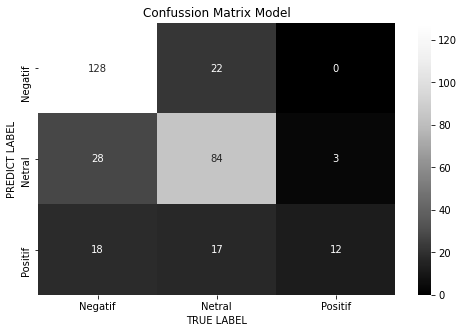

In [ ]:
# visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

label = ['Negatif', 'Netral', 'Positif']
f, ax = plt.subplots(figsize = (8,5))
sns.heatmap(confusion_matrix(Y_test, y_pred), xticklabels=label,yticklabels=label,annot = True, fmt=".0f", ax=ax,cmap="Greys_r")
plt.title("Confussion Matrix Model")
plt.xlabel("TRUE LABEL")
plt.ylabel("PREDICT LABEL")
plt.show()

In [ ]:
#melihat nilai jumlah label positif, negatif, dan netral

dataset_clean['Label'].value_counts()

-1    477
0     396
1     166
Name: Label, dtype: int64

Label
-1       477
0        396
1        166
dtype: int64


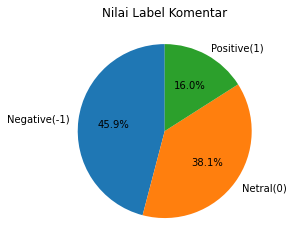

In [ ]:
print (dataset_clean[['Label']].value_counts())
ax = (dataset_clean[['Label']].value_counts().plot(kind='pie', label="", autopct='%.1f',labels=["Negative(-1)","Netral(0)", "Positive(1)"],
                                                  startangle=90, title = 'Nilai Label Komentar'))
for t in ax.texts:
    try: 
        float(t.get_text())
        t.set_text(t.get_text()+"%")
    except ValueError:
        pass